## **실습 목표**
고수준 API의 원리와 구조에 대한 이해를 위해, PyTorch의 핵심 구성 요소 중 하나인 nn.Tensor와 nn.Parameter를 배우고, PyTorch를 이용한 간단한 회귀 모델을 구현하여 AutoGrad를 더 자세히 학습한다.

### **torch.nn.Module**
- 딥러닝을 구성하는 Layer의 base class
- Input, Output, Forward, Backward 정의
- 학습의 대상이 되는 parameter(tensor) 정의

**❓퀴즈**   
### **nn.Parameter**
- Tensor 객체의 상속 객체
- **🖊 정답:** nn.Module 내에 attribute가 될 때는 **required_grad=True**로 지정, 학습 대상이 되는 Tensor
- 대부분의 layer에는 weight값들이 지정되어 있음


### **Parameter vs Tensor**

In [ ]:
import torch
from torch import nn
from torch import Tensor

**❓퀴즈**   

In [ ]:
# PyTorch의 Parameter를 사용

class MyLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        # (in_features, out_features) shape의 random tensor를 Parameter 객체로 변환
        self.weights = nn.Parameter( # torch.randn만으로는 require_grad=True가 아니기 때문에, nn.Parameter가 필요하다.
            torch.randn(in_features, out_features)
        )

        # (out_features) shape의 random tensor를 학습 가능한 Parameter 객체로 변환
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [ ]:
x = torch.randn(5, 7)

In [ ]:
layer = MyLinear(7, 12)
layer(x)

tensor([[-0.3209,  2.1264, -0.6808,  2.6160, -0.9707, -1.8203, -1.2502, -1.5284,
         -1.0577,  2.1427,  3.3806,  0.1303],
        [ 3.2082,  0.6254, -1.2288, -0.0782,  1.3250, -0.6978,  1.8770,  0.6202,
          0.7853,  1.2671,  2.2383,  1.3596],
        [-2.4555, -3.6363,  1.8153,  3.0780, -1.7065,  1.5298,  1.5724, -3.2888,
         -2.6798, -2.3529,  2.0088,  1.1868],
        [ 0.2963,  0.3153,  2.4996, -4.6103,  2.4549,  4.1989, -3.6828, -1.6775,
          2.4584,  0.2183, -3.9881,  0.0793],
        [ 3.1889, -3.0887, -2.0728,  0.1865,  2.2295, -0.3976,  5.2868,  0.9944,
         -4.0118, -0.9897,  2.5607,  4.4827]], grad_fn=<AddBackward0>)

In [ ]:
# backward시 미분이 되는 값들
for value in layer.parameters():
    print(value)

Parameter containing:
tensor([[ 0.7275, -0.2626, -0.0055, -2.3804,  2.6929,  0.9934, -1.6255,  0.1420,
          0.9081, -0.9445, -0.8279, -0.4499],
        [-0.6969, -1.9248,  0.9920, -0.6459,  0.1172,  0.9111, -1.0515, -0.3036,
         -0.2256,  1.3976,  0.2549, -0.0319],
        [ 0.4015,  0.5881,  0.9020,  0.2868,  0.3687,  0.3221,  1.6980,  0.2081,
          0.9714, -1.9410,  0.1164,  0.2499],
        [ 0.7718,  1.9615,  0.2366, -0.4064, -0.6395, -0.3823,  0.2179,  0.9173,
          0.9572,  1.9987, -0.6044,  0.3810],
        [ 0.9517, -1.2653, -0.5960, -0.2218,  0.2207,  0.1349,  2.4612,  0.8003,
         -1.2854, -0.7182, -0.3752,  1.5829],
        [-0.0669,  0.2771,  0.9726, -0.1349, -1.3141,  1.3081,  0.8397, -0.4515,
          2.1620, -1.3605, -2.1724, -0.6928],
        [ 1.3629, -0.7788, -0.2229, -0.2883,  0.3787, -0.2127,  0.1712,  0.6909,
          2.0979,  1.3454,  1.3486, -0.8887]], requires_grad=True)
Parameter containing:
tensor([-0.1434, -0.3151,  0.4319,  0.7669, -0

In [ ]:
# Tensor
# (5,12)가 나오긴 한다(방식은 거의 똑같음)
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.weights = Tensor(
            torch.randn(in_features, out_features)
        )

        self.bias = Tensor(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

layer = MyLinear(7, 12)
layer(x)

tensor([[-2.2862, -4.6165,  2.7589, -0.1104, -2.0657,  1.6329, -2.4026,  4.2405,
          1.3915,  3.5753,  3.9085, -0.3476],
        [ 1.5358,  1.2119, -1.2750, -3.4027,  3.5839, -5.9234, -1.3493, -4.3370,
         -0.3109, -4.3377,  1.6104,  2.3860],
        [ 0.3259, -3.4820, -2.3949,  3.4421, -2.1045,  2.8493,  9.3363,  7.3993,
          1.2830,  4.9484,  4.9028, -2.3938],
        [ 3.3455, -2.4499, -0.9701,  2.0885,  0.6346, -2.7320,  4.5760, -0.2153,
          2.6893,  4.3200,  2.0215, -2.7359],
        [ 3.5463, -0.8589, -2.9683,  4.4417, -0.2041,  0.3601,  6.4771,  1.7572,
          0.7325,  2.3258,  2.3545, -1.0611]])

In [ ]:
# parameter를 출력했을 때 아무것도 나오지 않음
for value in layer.parameters():
    print(value)

**❓퀴즈**   
### **Backward**
- Layer에 있는 Parameter들의 미분을 수행
- **🖊 정답:** Forward의 결과 값(model의 output = 예측치)과 실제 값간의 차이(loss)에 대해 미분 수행
- 해당 값으로 Parameter 업데이트


### **AutoGrad for Linear Regression**
$$y=2x+1$$

In [ ]:
import numpy as np

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1,1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [ ]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
inputDim = 1
outputDim = 1
learningRate = 0.01
epochs = 50

model = LinearRegression(inputDim, outputDim)
### for GPU ###
if torch.cuda.is_available():
    model.cuda()

In [ ]:
# lost function 및 optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
    # input과 label을 PyTorch Variable 객체로 변환
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)

    # 모든 파라미터에 대해 gradient 계산
    loss.backward()

    # 파라미터 업데이트
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.0007875751471146941
epoch 1, loss 0.0007787785143591464
epoch 2, loss 0.0007700821734033525
epoch 3, loss 0.0007614942151121795
epoch 4, loss 0.0007529767462983727
epoch 5, loss 0.0007445731898769736
epoch 6, loss 0.0007362630567513406
epoch 7, loss 0.0007280411664396524
epoch 8, loss 0.0007199051324278116
epoch 9, loss 0.0007118657231330872
epoch 10, loss 0.0007039252086542547
epoch 11, loss 0.000696050759870559
epoch 12, loss 0.0006882842280901968
epoch 13, loss 0.0006805972079746425
epoch 14, loss 0.0006730033201165497
epoch 15, loss 0.000665483414195478
epoch 16, loss 0.0006580548943020403
epoch 17, loss 0.0006507146172225475
epoch 18, loss 0.0006434403476305306
epoch 19, loss 0.0006362481508404016
epoch 20, loss 0.000629147922154516
epoch 21, loss 0.0006221164367161691
epoch 22, loss 0.0006151667912490666
epoch 23, loss 0.0006082943291403353
epoch 24, loss 0.0006015060935169458
epoch 25, loss 0.0005947977770119905
epoch 26, loss 0.0005881425458937883
epoch 27, loss

In [ ]:
# 추론 시 gradient를 계산할 필요가 없으므로 gradient 비활성화
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 0.96035224]
 [ 2.9660618 ]
 [ 4.9717717 ]
 [ 6.9774814 ]
 [ 8.983191  ]
 [10.9889    ]
 [12.99461   ]
 [15.0003195 ]
 [17.00603   ]
 [19.01174   ]
 [21.017448  ]]


In [ ]:
# model의 파라미터를 순회하여 name과 parameter값 출력
for p in model.parameters():
    if p.requires_grad:
        print(p.name, p.data)

None tensor([[2.0057]])
None tensor([0.9604])


### **Logistic Regression**

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(torch.__version__)

2.3.0+cu121


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [ ]:
#자동으로 zip파일을 풀어주는 코드
import urllib
import os
import shutil
from zipfile import ZipFile

# 주어진 URL에서 파일을 다운로드하고 로컬 파일 시스템에 저장
urllib.request.urlretrieve(DATA_PATH, 'hymenoptera_data.zip')

with ZipFile('hymenoptera_data.zip', 'r') as zipObj:
    # ZIP파일의 모든 내용을 현재 디렉토리에 압축 해제
    zipObj.extractall()
# 파일 및 폴더의 이름 변경
os.rename('hymenoptera_data', 'data')

In [ ]:
data_dir = './data'

# 데이터 변환
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        result = torch.reshape(img, (-1,))
        return result

## transformations used to standardize and normalize the datasets
data_transforms= {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(), # 이미지 파일을 텐서로
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,))
    ])
}

# image dataset 생성
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                                    for x in ['train', 'val']}


## load the entire dataset: we are not using minibatches here
# dataloader -> 데이터를 가져와서 GPU에 계속 올려주는 역할
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size = len(image_datasets['train']),
                                            shuffle = True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                            batch_size = len(image_datasets['val']),
                                            shuffle = True)

Dimension of imange: torch.Size([244, 150528]) 
 Dimension of labels: torch.Size([244])


<ipython-input-52-80bc4180dbab>:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())


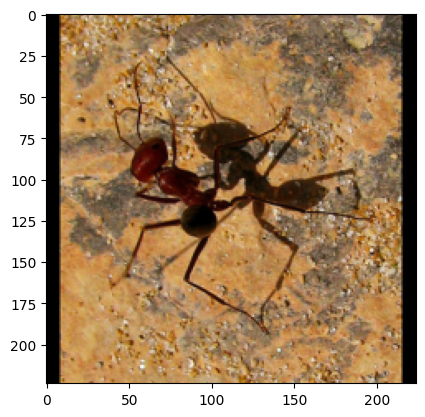

In [ ]:
# iterator에서 다음 값을 자동으로 가져옴
x, y = next(iter(train_dataset))

dim = x.shape[1]
print('Dimension of imange:', x.shape, '\n',
      'Dimension of labels:', y.shape)

# plt.imshow((height, width, channel)), 전치 해줘야 한다.
plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())


In [ ]:
# Logistic Regression
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # 자동 미분이 아니라 직접 미분하기 때문에 파라미터를 굳이 선언 안 해줬다
        self.w = torch.zeros(dim, 1, dtype=torch.float32, requires_grad=True).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {'dw': torch.zeros(dim, 1, dtype=torch.float).to(device),
                      'db': torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)

    def forward(self, x):
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1+torch.exp(-z))

    def backward(self, x, yhat, y):
        # PyTorch nn.Module은 backward 재정의 가능함.
        self.grads['dw'] = (1/x.shape[1]) * torch.mm(x, (yhat-y).T)
        self.grads['db'] = (1/x.shape[1]) * torch.sum(yhat-y)

    def optimize(self):
        self.w = self.w - self.lr * self.grads['dw']
        self.b = self.b - self.lr * self.grads['db']

    def step(self):
        with torch.no_grad():
            self.w -= self.lr * self.grads['dw']
            self.b -= self.lr * self.grads['db']

def loss(yhat, y):
    m = y.size()[1]
    return -(1/m)*torch.sum(y*torch.log(yhat) + (1-y)* torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0][i] > 0.5:
            y_prediction[0][i] = 1
        else:
            y_prediction[0][i] = 0
    return 100-torch.mean(torch.abs(y_prediction-y)*100)

In [ ]:
# 학습한 게 다음 학습에 반영이 되지 않는 코드
x, y =next(iter(train_dataset))

x_flatten = x.T
y = y.unsqueeze(0)

dim = x_flatten.shape[0]

model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

cost = loss(yhat, y)
prediction = predict(yhat, y)
print('Cost:', cost)
print('Accuracy:', prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost: tensor(0.6931)
Accuracy: tensor(50.4098)


In [ ]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 50 # 100번은 내 RAM이 못 버틴다..
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0)
    return x_flatten, y

#train data에서 data를 불러오는 작업
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)

    lrmodel.backward(x.to(device),
                     yhat.to(device),
                     y.to(device))
    lrmodel.optimize()

    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)
    if i % 10==0:
        costs.append(cost)
    if i% 10==0:
        print('Cost after iteration {}: {} | Train Acc: {}'.format(i,
                                                                   cost,
                                                                   train_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969
Cost after iteration 10: 0.6691464781761169 | Train Acc: 64.3442611694336
Cost after iteration 20: 0.6513172388076782 | Train Acc: 68.442626953125
Cost after iteration 30: 0.6367813944816589 | Train Acc: 68.03279113769531
Cost after iteration 40: 0.6245325207710266 | Train Acc: 69.67213439941406


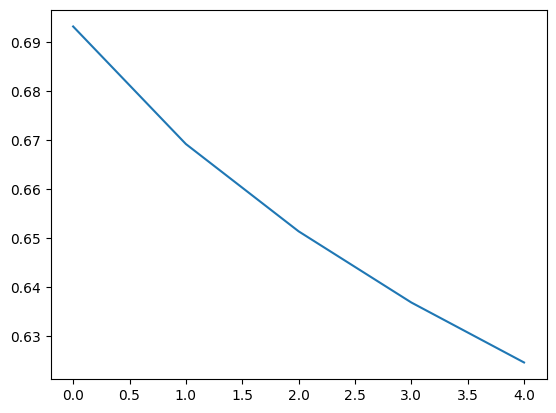

In [ ]:
plt.plot(costs)
plt.show()